In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip /content/gdrive/MyDrive/data.zip

# Topic: Flower Variety Classification using CNN
### **Introduction:** 
It is a Multiclass image classification problem.

### **About the Data Set:**
The dataset I am using here for the flower recognition task contains 4242 flower images. Flower types - daisy, dandelion, roses, sunflowers, tulips. The photos are not in high resolution, approximately 320×240 pixels. Photos are not reduced to one size; they have different proportions.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
%matplotlib inline

In [7]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, roc_auc_score

In [12]:
import tensorflow as tf
import random as rn
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta
from tensorflow.keras.utils import to_categorical

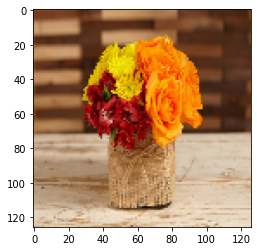

In [13]:
# Plotting a random Image

image  = plt.imread("/content/flowers/flowers/flower_photos/test/roses/15255964274_cf2ecdf702.jpg")
image = cv2.resize(image, (126,126))
plt.imshow(image)
plt.show()


In [14]:
X_train = list()
Y_train = list()

for i in os.listdir("/content/flowers/flowers/flower_photos/train/daisy/"):
    try:
        img_path = "/content/flowers/flowers/flower_photos/train/daisy/"+i
        image = plt.imread(img_path)
        image = cv2.resize(image,(130,130))
        X_train.append(image)
        Y_train.append(0)
    except:
        None
        
for i in os.listdir("/content/flowers/flowers/flower_photos/train/dandelion/"):
    try:
        img_path = "/content/flowers/flowers/flower_photos/train/dandelion/"+i
        image = plt.imread(img_path)
        image = cv2.resize(image,(130,130))
        X_train.append(image)
        Y_train.append(1)
    except:
        None
        
for i in os.listdir("/content/flowers/flowers/flower_photos/train/roses/"):
    try:
        img_path = "/content/flowers/flowers/flower_photos/train/roses/"+i
        image = plt.imread(img_path)
        image = cv2.resize(image,(130,130))
        X_train.append(image)
        Y_train.append(2)
    except:
        None
        
for i in os.listdir("/content/flowers/flowers/flower_photos/train/sunflowers/"):
    try:
        img_path = "/content/flowers/flowers/flower_photos/train/sunflowers/"+i
        image = plt.imread(img_path)
        image = cv2.resize(image,(130,130))
        X_train.append(image)
        Y_train.append(3)
    except:
        None
        
for i in os.listdir("/content/flowers/flowers/flower_photos/train/tulips/"):
    try:
        img_path = "/content/flowers/flowers/flower_photos/train/tulips/"+i
        image = plt.imread(img_path)
        image = cv2.resize(image,(130,130))
        X_train.append(image)
        Y_train.append(4)
    except:
        None



In [15]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)

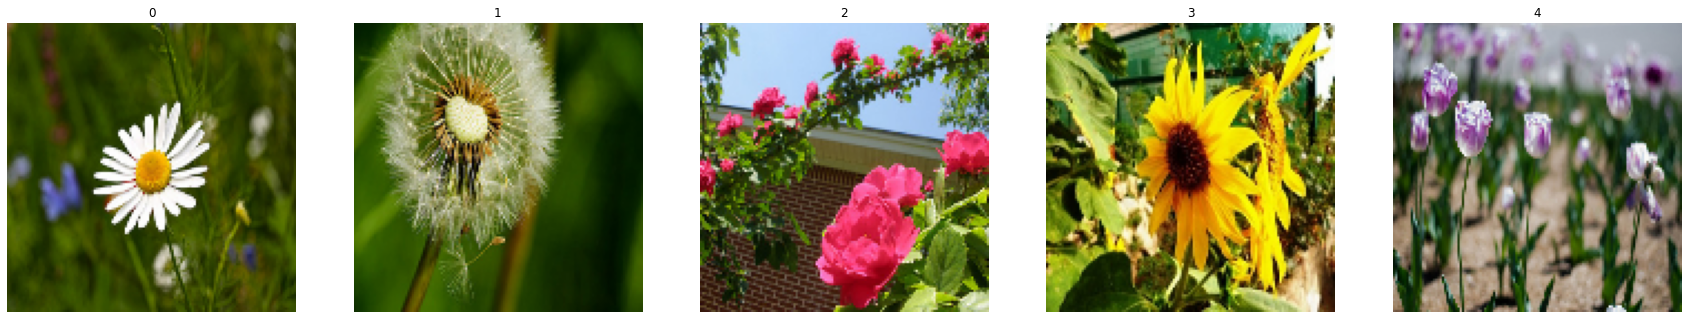

In [16]:
# Plotting one of all the kinds of Images

plt.figure(figsize=(30,30))

for i in range(5):
    image = X_train[800*i]
    plt.subplot(1,5,i+1)
    plt.imshow(image)
    plt.axis("off")
    plt.title(Y_train[800*i])

In [17]:
X_test = list()
Y_test = list()

for i in os.listdir("/content/flowers/flowers/flower_photos/test/daisy"):
    try:
        img_path = "/content/flowers/flowers/flower_photos/test/daisy/"+i
        image = plt.imread(img_path)
        image = cv2.resize(image,(130,130))
        X_test.append(image)
        Y_test.append(0)
    except:
        None
        
for i in os.listdir("/content/flowers/flowers/flower_photos/test/dandelion"):
    try:
        img_path = "/content/flowers/flowers/flower_photos/test/dandelion/"+i
        image = plt.imread(img_path)
        image = cv2.resize(image,(130,130))
        X_test.append(image)
        Y_test.append(1)
    except:
        None
        
for i in os.listdir("/content/flowers/flowers/flower_photos/test/roses"):
    try:
        img_path = "/content/flowers/flowers/flower_photos/test/roses/"+i
        image = plt.imread(img_path)
        image = cv2.resize(image,(130,130))
        X_test.append(image)
        Y_test.append(2)
    except:
        None
        
for i in os.listdir("/content/flowers/flowers/flower_photos/test/sunflowers"):
    try:
        img_path = "/content/flowers/flowers/flower_photos/test/sunflowers/"+i
        image = plt.imread(img_path)
        image = cv2.resize(image,(130,130))
        X_test.append(image)
        Y_test.append(3)
    except:
        None
        
for i in os.listdir("/content/flowers/flowers/flower_photos/test/tulips"):
    try:
        img_path = "/content/flowers/flowers/flower_photos/test/tulips/"+i
        image = plt.imread(img_path)
        image = cv2.resize(image,(130,130))
        X_test.append(image)
        Y_test.append(4)
    except:
        None


X_val = list()
Y_val = list()

for i in os.listdir("/content/flowers/flowers/flower_photos/validation/daisy"):
    try:
        img_path = "/content/flowers/flowers/flower_photos/validation/daisy/"+i
        image = plt.imread(img_path)
        image = cv2.resize(image,(130,130))
        X_val.append(image)
        Y_val.append(0)
    except:
        None
        
for i in os.listdir("/content/flowers/flowers/flower_photos/validation/dandelion"):
    try:
        img_path = "/content/flowers/flowers/flower_photos/validation/dandelion/"+i
        image = plt.imread(img_path)
        image = cv2.resize(image,(130,130))
        X_val.append(image)
        Y_val.append(1)
    except:
        None
        
for i in os.listdir("/content/flowers/flowers/flower_photos/validation/roses"):
    try:
        img_path = "/content/flowers/flowers/flower_photos/validation/roses/"+i
        image = plt.imread(img_path)
        image = cv2.resize(image,(130,130))
        X_val.append(image)
        Y_val.append(2)
    except:
        None
        
for i in os.listdir("/content/flowers/flowers/flower_photos/validation/sunflowers"):
    try:
        img_path = "/content/flowers/flowers/flower_photos/validation/sunflowers/"+i
        image = plt.imread(img_path)
        image = cv2.resize(image,(130,130))
        X_val.append(image)
        Y_val.append(3)
    except:
        None
        
for i in os.listdir("/content/flowers/flowers/flower_photos/validation/tulips"):
    try:
        img_path = "/content/flowers/flowers/flower_photos/validation/tulips/"+i
        image = plt.imread(img_path)
        image = cv2.resize(image,(130,130))
        X_val.append(image)
        Y_val.append(4)
    except:
        None



In [18]:
X_test = np.array(X_test)
X_val = np.array(X_val)
Y_test = np.array(Y_test)
Y_val = np.array(Y_val)

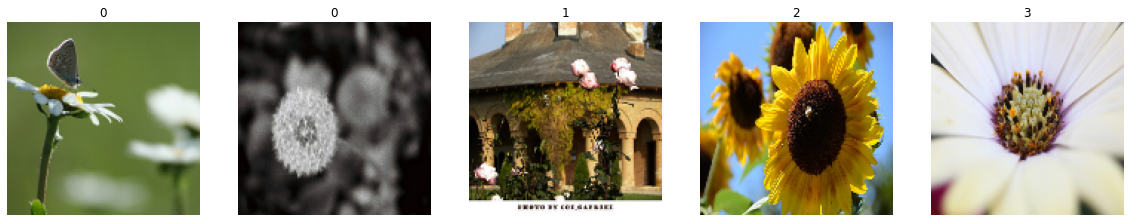

In [19]:
plt.figure(figsize = (20,20))
for i in range(5):
    img = X_test[12*i]
    plt.subplot(1,5,i+1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(Y_test[9*i])
plt.show()

In [20]:
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(3,3), padding="Same", activation="relu" ))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(filters=128, kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(filters=256,kernel_size = (3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(filters=512,kernel_size = (3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(1024,activation="relu"))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Dense(5,activation="softmax"))
input_shape = (None,130,130,3)
model.build(input_shape)

model.summary()

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 130, 130, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 65, 65, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 65, 65, 64)       256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 65, 65, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 65, 65, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 128)      0

In [21]:
datagen = ImageDataGenerator( featurewise_center = False, samplewise_center=False, featurewise_std_normalization = False, samplewise_std_normalization=False, rotation_range = 60, zoom_range=0.1,width_shift_range=0.1,height_shift_range=0.1,shear_range=0.1,fill_mode="reflect")

datagen.fit(X_train)

In [22]:
history = model.fit_generator(datagen.flow(X_train,Y_train,batch_size=64), epochs=50, validation_data=(X_val, Y_val), steps_per_epoch=X_train.shape[0] // 64)

Epoch 1/50
55/55 [==============================] - 348s 6s/step - loss: 1.4989 - accuracy: 0.4925 - val_loss: 6.7592 - val_accuracy: 0.3000
Epoch 2/50
55/55 [==============================] - 348s 6s/step - loss: 1.1305 - accuracy: 0.5826 - val_loss: 0.8072 - val_accuracy: 0.6375
Epoch 3/50
55/55 [==============================] - 346s 6s/step - loss: 1.0291 - accuracy: 0.6133 - val_loss: 0.6718 - val_accuracy: 0.7250
Epoch 4/50
55/55 [==============================] - 343s 6s/step - loss: 0.9254 - accuracy: 0.6577 - val_loss: 0.8019 - val_accuracy: 0.7250
Epoch 5/50
55/55 [==============================] - 348s 6s/step - loss: 0.8809 - accuracy: 0.6761 - val_loss: 1.3250 - val_accuracy: 0.6000
Epoch 6/50
55/55 [==============================] - 349s 6s/step - loss: 0.8518 - accuracy: 0.6781 - val_loss: 0.8005 - val_accuracy: 0.7375
Epoch 7/50
55/55 [==============================] - 352s 6s/step - loss: 0.8041 - accuracy: 0.6899 - val_loss: 0.8976 - val_accuracy: 0.6875
Epoch 8/50
55

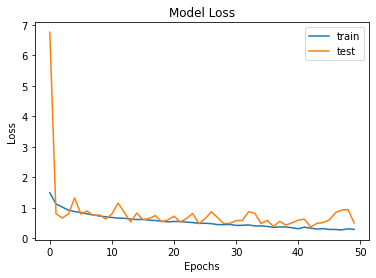

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

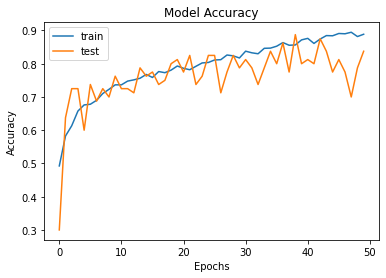

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()